# Bitcoin Price Trend and Future Returns Forecast
# Name of Author：Tracy Yunqi Lin

In [ ]:
## This Python code sample aims to forecast the price trend of Bitcoin and its future returns based on the information on historic trades for Bitcoin over the last year 
## by establishing different regression models with financial time series.
## Please note this work sample is only used for a job application with authorization of Tracy Yunqi Lin

# Load Libararies

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
import matplotlib.pyplot as plt

# Read data
## Remove null values

In [2]:
df_data = pd.read_csv('BTC_USD.csv') 
df_data=df_data[~(df_data['Open'].isnull())]
print(df_data.head())

         Date          Open          High           Low         Close  \
0  2020-12-02  18801.744141  19308.330078  18347.718750  19201.091797   
1  2020-12-03  19205.925781  19566.191406  18925.785156  19445.398438   
2  2020-12-04  19446.966797  19511.404297  18697.193359  18699.765625   
3  2020-12-05  18698.384766  19160.449219  18590.193359  19154.230469   
4  2020-12-06  19154.179688  19390.500000  18897.894531  19345.121094   

      Adj Close        Volume  
0  19201.091797  3.738770e+10  
1  19445.398438  3.193032e+10  
2  18699.765625  3.387239e+10  
3  19154.230469  2.724246e+10  
4  19345.121094  2.529378e+10  


# Partition test set and train set

In [3]:
df_train = df_data.iloc[:int(len(df_data)*0.7)]
df_train =  df_train.reset_index(drop=True) 
df_test = df_data[~df_data.index.isin(df_train.index)]
df_test =  df_test.reset_index(drop=True)

# Division features and labels

In [4]:
df_train_x = df_train[['Open', 'High', 'Low', 'Volume']].copy()
df_train_y = df_train['Close'].copy()
df_test_x = df_test[['Open', 'High', 'Low', 'Volume']].copy()
df_test_y = df_test['Close'].copy()
print(df_train_x.head())
print(df_train_y.head())
print(df_test_x.head())
print(df_test_y.head())

           Open          High           Low        Volume
0  18801.744141  19308.330078  18347.718750  3.738770e+10
1  19205.925781  19566.191406  18925.785156  3.193032e+10
2  19446.966797  19511.404297  18697.193359  3.387239e+10
3  18698.384766  19160.449219  18590.193359  2.724246e+10
4  19154.179688  19390.500000  18897.894531  2.529378e+10
0    19201.091797
1    19445.398438
2    18699.765625
3    19154.230469
4    19345.121094
Name: Close, dtype: float64
           Open          High           Low        Volume
0  47810.687500  48098.683594  46177.632813  3.121135e+10
1  47096.667969  47357.105469  45579.589844  3.098896e+10
2  47019.960938  47998.097656  45700.320313  3.277688e+10
3  45936.457031  47139.570313  44512.417969  3.345136e+10
4  44686.750000  45952.062500  44364.027344  3.219412e+10
0    47096.945313
1    47047.003906
2    46004.484375
3    44695.359375
4    44801.187500
Name: Close, dtype: float64


# Smooth data

In [5]:
df_train_x["Open"] = np.log1p(df_train_x["Open"])
df_train_x["High"] = np.log1p(df_train_x["High"])
df_train_x["Low"] = np.log1p(df_train_x["Low"])
df_train_x["Volume"] = np.log1p(df_train_x["Volume"])
df_train_y=np.log1p(df_train_y)
df_test_x["Open"] = np.log1p(df_test_x["Open"])
df_test_x["High"] = np.log1p(df_test_x["High"])
df_test_x["Low"] = np.log1p(df_test_x["Low"])
df_test_x["Volume"] = np.log1p(df_test_x["Volume"])
df_test_y=np.log1p(df_test_y)
print(df_train_x.head())
print(df_train_y.head())
print(df_test_x.head())
print(df_test_y.head())

       Open      High       Low     Volume
0  9.841758  9.868344  9.817315  24.344608
1  9.863026  9.881610  9.848333  24.186822
2  9.875498  9.878806  9.836182  24.245866
3  9.836246  9.860656  9.830443  24.028042
4  9.860328  9.872590  9.846859  23.953824
0    9.862774
1    9.875417
2    9.836320
3    9.860331
4    9.870247
Name: Close, dtype: float64
        Open       High        Low     Volume
0  10.775025  10.781031  10.740272  24.164048
1  10.759979  10.765493  10.727237  24.156897
2  10.758349  10.778937  10.729882  24.212989
3  10.735036  10.760889  10.703546  24.233358
4  10.707455  10.735376  10.700207  24.195050
0    10.759985
1    10.758924
2    10.736516
3    10.707647
4    10.710012
Name: Close, dtype: float64


# Ridge
## Adjust the super parameter alpha to find the optimal value

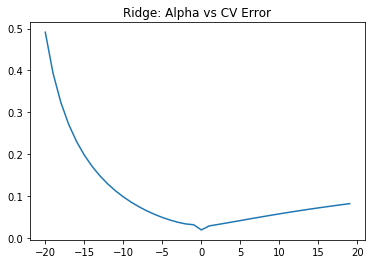

Ridge: the best alphas: 0, the average mean squared error: 0.019254554783758707
Ridge: mean squared error of the test set is 0.0001830875567075562


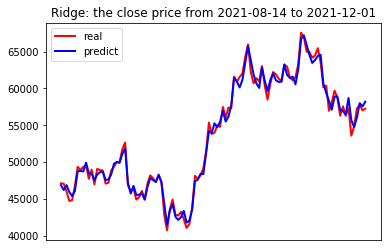

In [7]:
alphas = range(-20,20)
test_scores = {}
for alpha in alphas:
    ridge_clf = Ridge(alpha=alpha)
    test_score = np.sqrt(-cross_val_score(ridge_clf, df_train_x, df_train_y, cv=10, scoring='neg_mean_squared_error'))
    test_scores[alpha]=np.mean(test_score)
plt.plot(alphas, list(test_scores.values()))
plt.title("Ridge: Alpha vs CV Error");
plt.show()
best_alpha=sorted(test_scores.items(), key = lambda k:(k[1], k[0]))[0][0]
print("Ridge: the best alphas: "+str(best_alpha)+", the average mean squared error: " 
      +str(test_scores[best_alpha]))
ridge_clf_best = Ridge(alpha=best_alpha)
ridge_clf_best.fit(df_train_x,df_train_y)
df_test_y_predict = np.expm1(ridge_clf_best.predict(df_test_x))
df_result = pd.DataFrame(data= {'Date' : df_test['Date'], 'Close': df_test_y_predict})
print("Ridge: mean squared error of the test set is " + 
      str(mean_squared_error(ridge_clf_best.predict(df_test_x),df_test_y)))
plt.figure()
plt.xticks([])
plt.plot(df_test['Date'],df_test['Close'],color='red',linewidth=2.0,linestyle='-')
plt.title("Ridge: the close price from " + str(df_test.iloc[0]['Date'])
          +" to " + str(df_test.iloc[-1]['Date']));
plt.plot(df_test['Date'],df_test_y_predict,color='blue',linewidth=2.0,linestyle='-')
plt.legend(["real","predict"])
plt.show()

# DecisionTreeRegressor
## Adjust the super parameter max_depth to find the optimal value

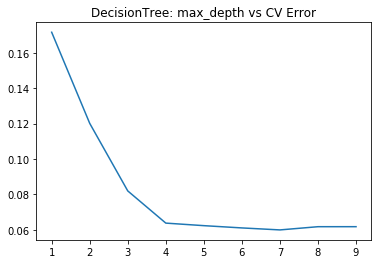

DecisionTree: the best max_depth: 7, the average mean squared error: 0.059989279132087625
DecisionTree: mean squared error of the test set is 0.000651575460001681


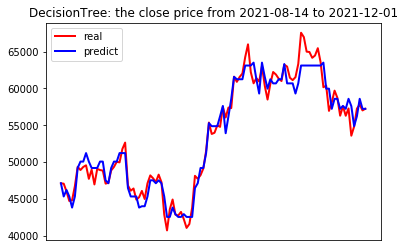

In [7]:
max_depths = range(1, 10)
test_scores = {}
for max_depth in max_depths:
    tree_clf = DecisionTreeRegressor(max_depth=max_depth)
    test_score = np.sqrt(-cross_val_score(tree_clf, df_train_x, df_train_y, cv=10, scoring='neg_mean_squared_error'))
    test_scores[max_depth]=np.mean(test_score)
plt.figure()
plt.plot(max_depths, list(test_scores.values()))
plt.title("DecisionTree: max_depth vs CV Error");
plt.show()
best_max_depth=sorted(test_scores.items(), key = lambda k:(k[1], k[0]))[0][0]
print("DecisionTree: the best max_depth: "+str(best_max_depth)+", the average mean squared error: " 
      +str(test_scores[best_max_depth]))
tree_clf_best = DecisionTreeRegressor(max_depth = best_max_depth)
tree_clf_best.fit(df_train_x,df_train_y)
df_test_y_predict = np.expm1(tree_clf_best.predict(df_test_x))
df_result = pd.DataFrame(data= {'Date' : df_test['Date'], 'Close': df_test_y_predict})
print("DecisionTree: mean squared error of the test set is " + 
      str(mean_squared_error(tree_clf_best.predict(df_test_x),df_test_y)))
plt.figure()
plt.xticks([])
plt.plot(df_test['Date'],df_test['Close'],color='red',linewidth=2.0,linestyle='-')
plt.title("DecisionTree: the close price from " + str(df_test.iloc[0]['Date'])
          +" to " + str(df_test.iloc[-1]['Date']));
plt.plot(df_test['Date'],df_test_y_predict,color='blue',linewidth=2.0,linestyle='-')
plt.legend(["real","predict"])
plt.show()

# Random Forest
## Adjust the super parameter n_estimator to find the optimal value

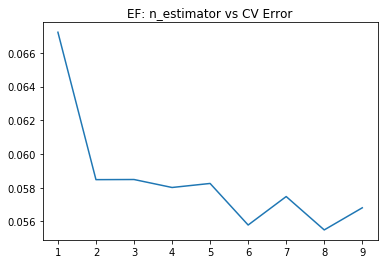

RF: the best n_estimator: 8, the average mean squared error: 0.05549707547542054
RF: mean squared error of the test set is 0.0006009775075662072


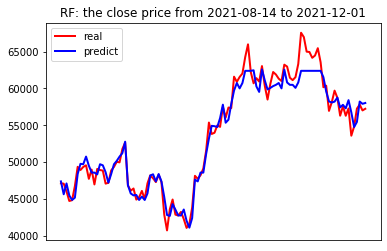

In [8]:
n_estimators = range(1, 10)
test_scores = {}
for n_estimator in n_estimators:
    rf_clf = ensemble.RandomForestRegressor(n_estimators=n_estimator)
    test_score = np.sqrt(-cross_val_score(rf_clf, df_train_x, df_train_y, cv=10, scoring='neg_mean_squared_error'))
    test_scores[n_estimator]=np.mean(test_score)
plt.figure()
plt.plot(n_estimators, list(test_scores.values()))
plt.title("EF: n_estimator vs CV Error");
plt.show()
best_n_estimator=sorted(test_scores.items(), key = lambda k:(k[1], k[0]))[0][0]
print("RF: the best n_estimator: "+str(best_n_estimator)+", the average mean squared error: " 
      +str(test_scores[best_n_estimator]))
rf_clf_best = ensemble.RandomForestRegressor(n_estimators=best_n_estimator)
rf_clf_best.fit(df_train_x,df_train_y)
df_test_y_predict = np.expm1(rf_clf_best.predict(df_test_x))
df_result = pd.DataFrame(data= {'Date' : df_test['Date'], 'Close': df_test_y_predict})
print("RF: mean squared error of the test set is " + 
      str(mean_squared_error(rf_clf_best.predict(df_test_x),df_test_y)))
plt.figure()
plt.xticks([])
plt.plot(df_test['Date'],df_test['Close'],color='red',linewidth=2.0,linestyle='-')
plt.title("RF: the close price from " + str(df_test.iloc[0]['Date'])
          +" to " + str(df_test.iloc[-1]['Date']));
plt.plot(df_test['Date'],df_test_y_predict,color='blue',linewidth=2.0,linestyle='-')
plt.legend(["real","predict"])
plt.show()

In [8]:
## Among all the regression methods, Ridge performs the best，
## Random Forest comes the second，and regression tree is the worst.